# Dot-Product Attention

The first attention mechanism we will focus on is dot-product (encoder-decoder) attention. When we perform many NLP tasks we would typically convert a word into a vector (*word2vec*), with transformers we perform the same operation. These vectors allows us to represent meaning numerically (eg days of the week may be clustered together, or we can perform logical arithmetic on the vectors - *King - Man + Woman = Queen*).

Because of this, we would expect sentences with similar meaning to have a similar set of values. For example, in neural machine translation, the phrase *"Hello, how are you?"*, and the Italian equivalent *"Ciao, come va?"* should share a similar matrix representation.

Now, when we iterate through each word, and compare the individual vectors between the two sequences - we should find that words such as *"Hello"* and *"Ciao"* have higher similarity than words that have different meaning such as *"are"* and *"Ciao"*.

![Attention function logic](../images/nmt_attention.png)

We can display this mapping between word attentions better using a heatmap:

![Attention heatmap example](../images/attention_heatmap.png)

## Calculating Alignment

This similarity between word vectors is known as *'alignment'*, and we calculate alignment between two vectors using the dot product. The dot product formula looks like:

$$
u \cdot v = \vert u \vert \vert v \vert cos \theta = \sum_{i=1}^{n}a_n b_n
$$

So, let's imagine rather than a high-dimensional vector (as we would usually expect with word vectors), we have simple, three-dimensional vectors which can be visualized. We have three of these vectors each representing a word:

In [1]:
hello = [0.71, 0.14, 0.51]
hi = [0.69, 0.15, 0.48]
tomato = [0.16, 0.59, 0.49]

In [2]:
import matplotlib.pyplot as plt

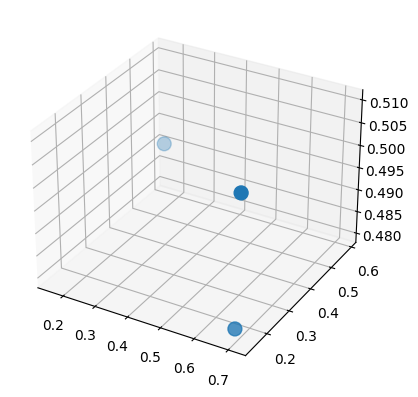

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

xs = [hello[0], hi[0], tomato[0]]
ys = [hello[1], hi[1], tomato[1]]
zs = [hello[2], hi[2], tomato[2]]

ax.scatter(xs, ys, zs, marker="o", s=100)

In [6]:
import numpy as np

In [7]:
a = np.array(hello)
b = np.array(hi)
c = np.array(tomato)

In [11]:
np.matmul(a, b.T)

0.7556999999999999

In [12]:
np.dot(a, b)   # same as above

0.7556999999999999

In [13]:
np.matmul(a, c.T)

0.4461

In [14]:
np.matmul(b, c.T)

0.4341

In [15]:
np.matmul(a, a.T)

0.7837999999999999